## Import the packages

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import RegexpTokenizer

# Reading the data

Use the `bbc-text` dataset.

We will employ a text categorization dataset based on articles (mentioned in `text` column). Each article is assigned a specific captegory. 

###Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [39]:
df = pd.read_csv('bbc-text.csv')
df.shape

(2225, 2)

In [40]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### Check the number of articles in each category

In [41]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

###Create a variable called "docs" to convert each article report narrative to individual tokens.(Hint: Use regular expression based tokenizer.)

In [42]:
docs = []
tokenizer = RegexpTokenizer( '[a-zA-Z]\w+' )
for i in range( 0,len( df ) ):
  docs.append( tokenizer.tokenize(df['text'][i]) )

# Proccessing the Data

In [43]:
def report(txt):
    text = []
    for news in txt:
        text.append(news)
    return text

In [44]:
news_text = report(df['text'].str.lower().str.split(' '))
news_text[:2]

[['tv',
  'future',
  'in',
  'the',
  'hands',
  'of',
  'viewers',
  'with',
  'home',
  'theatre',
  'systems',
  '',
  'plasma',
  'high-definition',
  'tvs',
  '',
  'and',
  'digital',
  'video',
  'recorders',
  'moving',
  'into',
  'the',
  'living',
  'room',
  '',
  'the',
  'way',
  'people',
  'watch',
  'tv',
  'will',
  'be',
  'radically',
  'different',
  'in',
  'five',
  'years',
  '',
  'time.',
  '',
  'that',
  'is',
  'according',
  'to',
  'an',
  'expert',
  'panel',
  'which',
  'gathered',
  'at',
  'the',
  'annual',
  'consumer',
  'electronics',
  'show',
  'in',
  'las',
  'vegas',
  'to',
  'discuss',
  'how',
  'these',
  'new',
  'technologies',
  'will',
  'impact',
  'one',
  'of',
  'our',
  'favourite',
  'pastimes.',
  'with',
  'the',
  'us',
  'leading',
  'the',
  'trend',
  '',
  'programmes',
  'and',
  'other',
  'content',
  'will',
  'be',
  'delivered',
  'to',
  'viewers',
  'via',
  'home',
  'networks',
  '',
  'through',
  'cable',
  

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
common_stopwords = nltk.corpus.stopwords.words('english')
words = []
for txt in news_text:
    words.extend(txt)
    
bbc_text = pd.Series(words).value_counts()
bbc_text = bbc_text.reset_index().rename(columns={'index':'term', 0:'freq'})
bbc_text.head()

,term,freq
0,,65553
1,the,52567
2,to,24955
3,of,19947
4,and,18561


In [47]:
bbc_text.tail()

,term,freq
43767,preparations.,1
43768,boe),1
43769,erected,1
43770,umemoto,1
43771,immaculate,1


In [48]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer

stemmer = PorterStemmer()
docs = df['text'].fillna('NA').str.lower().str.replace('[^a-z\s]','')
docs = docs.apply(remove_stopwords)
docs = stemmer.stem_documents(docs)
docs = pd.Series(docs)
docs

0       tv futur hand viewer home theatr system plasma...
1       worldcom boss left book worldcom boss berni eb...
2       tiger wari farrel gambl leicest rush make bid ...
3       yead face newcastl fa cup premiership newcastl...
4       ocean s raid box offic ocean s crime caper seq...
                              ...                        
2220    car pull retail figur retail sale fell januari...
2221    kilroi unveil immigr polici exchatshow host ro...
2222    rem announc new glasgow concert band rem annou...
2223    polit squabbl snowbal s commonplac argu blair ...
2224    souness delight euro progress boss graem soune...
Length: 2225, dtype: object

In [49]:
docs.shape, df['category'].shape

((2225,), (2225,))

## Data Processing and model building with count Vectorizor

### Data Processing with count Vectorizor

In [50]:

from wordcloud import WordCloud, STOPWORDS

In [51]:
stopwords = set(STOPWORDS)

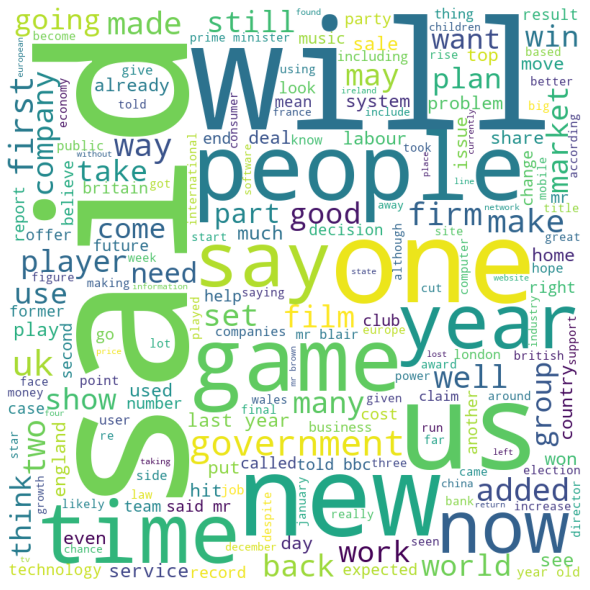

In [52]:

import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv("bbc-text.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.text:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

train_x, test_x, train_y, test_y = train_test_split(docs, df['category'],test_size=0.2, random_state=1)

vectorizer = CountVectorizer().fit(train_x)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(train_x)
test_dtm = vectorizer.transform(test_x)
vocab[:10]

['aa',
 'aaa',
 'aac',
 'aadc',
 'aaliyah',
 'aaltra',
 'aamir',
 'aan',
 'aarhu',
 'aaron']

### Check for the sparsity in the data

In [60]:
pd.DataFrame(train_dtm.toarray(), columns=vocab)

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aarhu,aaron,aashar,abacu,abandon,abat,abba,abbasi,abbei,abbot,abbott,abbrevi,abc,abdellatif,abdic,abdomen,abdomin,abduct,abdul,abdullah,abdullatif,abeb,abensur,aberavon,aberdeen,aberdeenbas,abey,abeyi,abhorr,abi,abid,abil,...,zellweg,zemecki,zen,zenden,zenith,zephyr,zeppelin,zero,zeroeight,zeroemiss,zeta,zetajon,zhang,zhaox,zheng,zib,zidan,zillion,zimbabw,zinc,zinedin,zip,ziyi,zodiac,zoe,zoellick,zogbia,zola,zomba,zombi,zombic,zone,zonealarm,zoom,zornotza,zorro,zubair,zuluaga,zurich,zvonareva
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Model building after count Vectorizor preprocessing(use SVM)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
 
from sklearn.metrics import accuracy_score, f1_score

In [63]:
train_x, validate_x, train_y, validate_y = train_test_split(docs, df['category'],test_size=0.2, random_state=1)

vectorizer = CountVectorizer(min_df=20).fit(train_x)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(train_x)
validate_dtm = vectorizer.transform(validate_x)


In [64]:
model_nb = clf.fit(train_dtm, train_y)
validate_y_pred = clf.predict(validate_dtm)
print(accuracy_score(validate_y, validate_y_pred))
#print(f1_score(validate_y, validate_y_pred))

0.9775280898876404


## Data Processing and model building with Tfidf Vectorizor

### Data Processing with Tfidf Vectorizor

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

train_x, test_x, train_y, test_y = train_test_split(docs, df['category'],test_size=0.2, random_state=1)

vectorizer = TfidfVectorizer().fit(train_x)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(train_x)
test_dtm = vectorizer.transform(test_x)
vocab[:10]

['aa',
 'aaa',
 'aac',
 'aadc',
 'aaliyah',
 'aaltra',
 'aamir',
 'aan',
 'aarhu',
 'aaron']

In [66]:
train_dtm = vectorizer.transform(train_x)
train_dtm.shape

(1780, 19501)

In [67]:
# TF matrix
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(docs)
vocab = vectorizer.get_feature_names()

final = pd.DataFrame(tf.toarray(), columns=vocab)  # Sparse matrix

In [68]:
pd.DataFrame(tf.toarray(), columns=vocab).shape

(2225, 21315)

In [69]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
vocab = vectorizer.get_feature_names()

print('IDF values')
for i, j in zip(vocab[:15], vectorizer.idf_[:15]):
    print(i, ':', j)

IDF values
aa : 8.014814351275545
aaa : 5.935372809595709
aac : 7.60934924316738
aadc : 8.014814351275545
aaliyah : 8.014814351275545
aaltra : 8.014814351275545
aamir : 8.014814351275545
aan : 8.014814351275545
aara : 8.014814351275545
aarhu : 8.014814351275545
aaron : 6.916202062607435
aashar : 8.014814351275545
abacu : 7.60934924316738
abandon : 5.273974327350344
abat : 7.09852361940139


In [70]:
pd.DataFrame(tf_idf.toarray(), columns=vocab).shape

(2225, 21315)

In [71]:
pd.DataFrame(tf_idf.toarray(), columns=vocab)  # Sparse matrix

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhu,aaron,aashar,abacu,abandon,abat,abba,abbasi,abbei,abbot,abbott,abbrevi,abc,abd,abdellatif,abdic,abdomen,abdomin,abduct,abdul,abdullah,abdullatif,abeb,abensur,aberavon,aberdeen,aberdeenbas,aberr,aberystwyth,abet,abey,...,zephaniah,zephyr,zeppelin,zero,zeroeight,zeroemiss,zeta,zetajon,zhang,zhaox,zheng,zib,zidan,zillion,zimbabw,zinc,zinedin,zip,ziyi,zodiac,zoe,zoellick,zogbia,zola,zomba,zombi,zombic,zombiesleapingoutofshadow,zone,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model building after Tfidf Vectorizor preprocessing(use SVM)

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
 
from sklearn.metrics import accuracy_score, f1_score

In [73]:
train_x, validate_x, train_y, validate_y = train_test_split(docs, df['category'],test_size=0.2, random_state=1)

vectorizer = TfidfVectorizer(min_df=20).fit(train_x)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(train_x)
validate_dtm = vectorizer.transform(validate_x)


In [74]:
model_nb = clf.fit(train_dtm, train_y)
validate_y_pred = clf.predict(validate_dtm)
print(accuracy_score(validate_y, validate_y_pred))
#print(f1_score(validate_y, validate_y_pred))

0.9797752808988764


# Compare the imapct of two different types of vectorization technique in model performance
**Draw the conclussion for model evaluations on different categories as well**

In [75]:
# TF IDF has better performance